# Time Series in Altair

Time series are graphs where the X-Axis is a time value, for example:
- Date
- Year, month, or day
- Hour, minute, or second
- Even numeric value representing period or order (e.g. 1,2,3, ..etc)

The line is the typical mark method used for time series to show change over time.

In [8]:
# Let's load our data
# using altair
import pandas as pd
import altair as alt

# you need a dataset
cars_df = pd.read_json("https://github.com/vega/vega-datasets/raw/gh-pages/data/cars.json")

# notice the year column
cars_df.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8           307         130                18   
1          11.5          8           350         165                15   
2          11.0          8           318         150                18   
3          12.0          8           304         150                16   
4          10.5          8           302         140                17   

                        Name Origin  Weight_in_lbs        Year  
0  chevrolet chevelle malibu    USA           3504  1970-01-01  
1          buick skylark 320    USA           3693  1970-01-01  
2         plymouth satellite    USA           3436  1970-01-01  
3              amc rebel sst    USA           3433  1970-01-01  
4                ford torino    USA           3449  1970-01-01

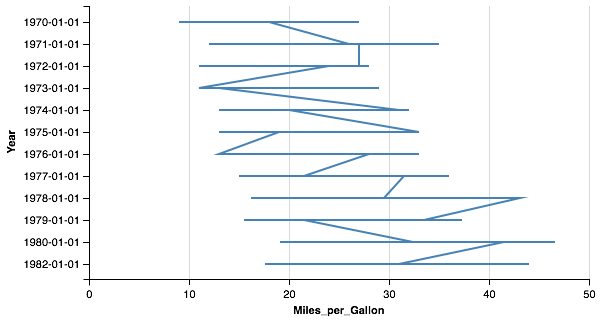

In [9]:
# Let's find out how gas milage improved over the years
alt.Chart(cars_df).mark_line().encode(x='Miles_per_Gallon', y='Year')

# where did I go wrong?

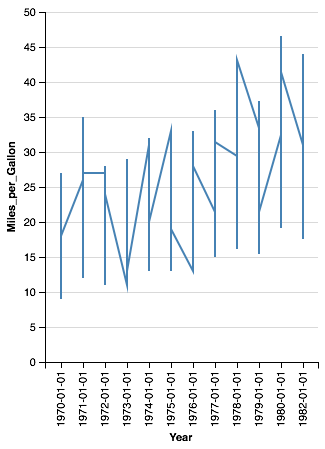

In [10]:
alt.Chart(cars_df).mark_line().encode(y='Miles_per_Gallon', x='Year')

# How can we improve? let's fix the year

In [14]:
# we want to convert into year only i.e. 1970
cars_df['Year'].head()

0    1970-01-01
1    1970-01-01
2    1970-01-01
3    1970-01-01
4    1970-01-01
Name: Year, dtype: object

In [15]:
# use apply to perform a function on every element in series
# lambda is a way to quickly define simple one line functions
cars_df['Year'].apply(lambda x:x.split("-")[0]).head()

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Year, dtype: object

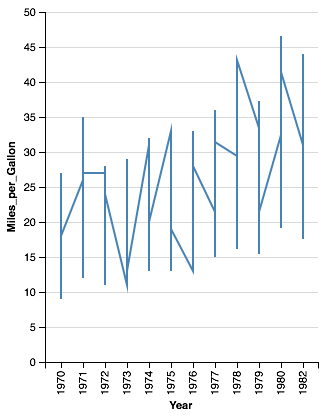

In [22]:
# let's update
cars_df['Year'] = cars_df['Year'].apply(lambda x:x.split("-")[0])

# let's show the new graph
alt.Chart(cars_df).mark_line().encode(y='Miles_per_Gallon', x='Year')

# How can we improve? we have multiple observations per year, so let's get the average

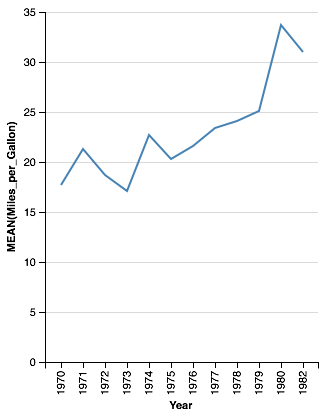

In [27]:
alt.Chart(cars_df).mark_line().encode(y='mean(Miles_per_Gallon)', x='Year')

# Can we improve the x axis using altair channels?

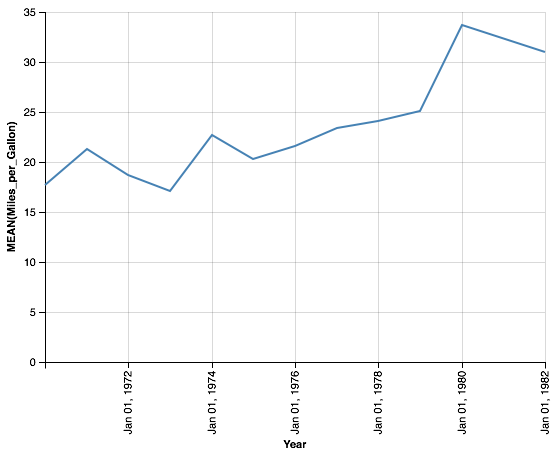

In [28]:
# Let's set the year type to time
alt.Chart(cars_df).mark_line().encode(y='mean(Miles_per_Gallon)', x='Year:T')

# We are back to dates at the bottom, let's fix the time unit

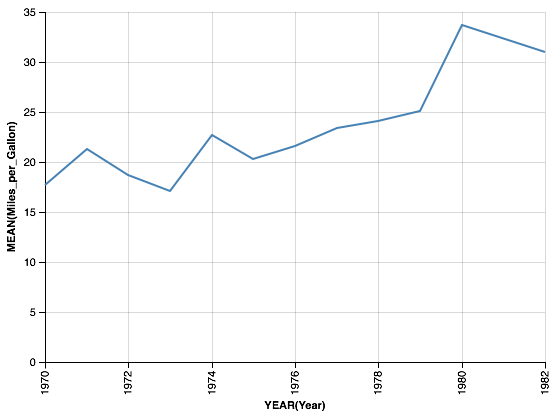

In [29]:
# We have to use alt.X to give additional options for the x-axis
# We could have done this without changing the dataframe originally
alt.Chart(cars_df).mark_line().encode(
    y='mean(Miles_per_Gallon)',
    x=alt.X('Year:T', timeUnit='year'),
)

# clearly the average miles per gallons are improving over the years
# is it true for all countries? let's improve our graph

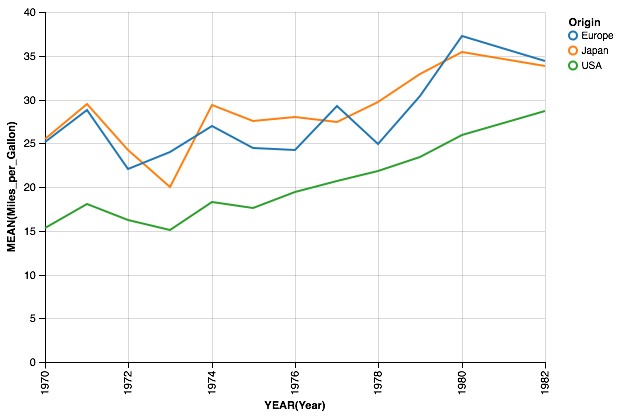

In [30]:
alt.Chart(cars_df).mark_line().encode(
    y='mean(Miles_per_Gallon)',
    x=alt.X('Year:T', timeUnit='year'),
    color='Origin',
)

# All are improving, but the average for europe and Japan is better than US
# Could it be from the type of vehicle? let's further break down based on cylinders

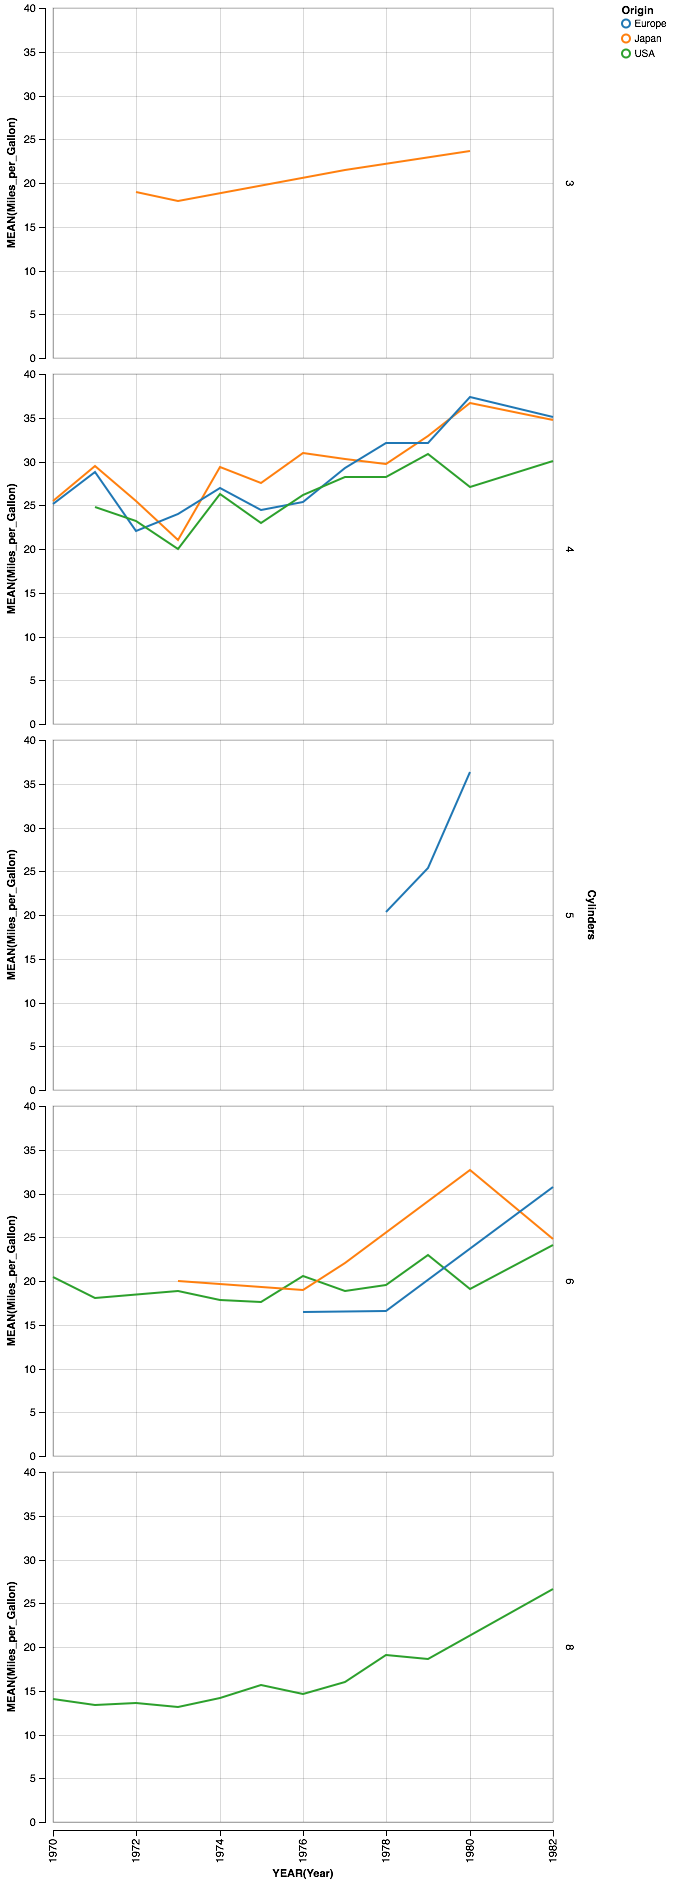

In [36]:
# Since we can only pass a single variable for color
# let's use row or column to draw graphs for cylinders
alt.Chart(cars_df).mark_line().encode(
    y='mean(Miles_per_Gallon)',
    x=alt.X('Year:T', timeUnit='year'),
    color='Origin',
    row='Cylinders',
)


# Some insights from the previous graphs
- 3 and 5 cylinders exist, and are available in japan and europe respectively, best to exclude
- 8 Cylinders available in US only, they have the worst MPG rating, best to exclude also
- Seems like cars manufactured in US wit 4 and 6 cylinders are as good as Japanese and European cars
- Let's improve our graph to make our point clearer

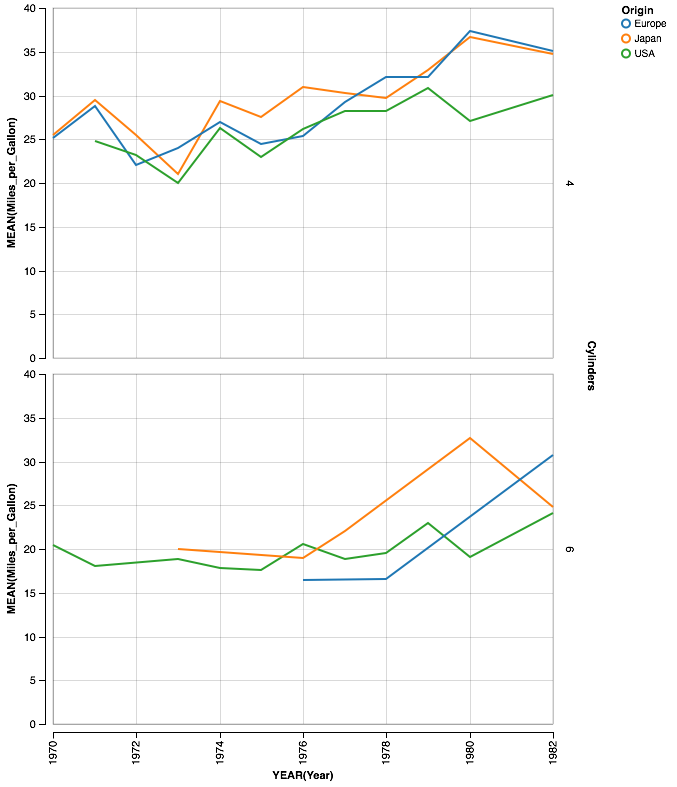

In [40]:
# Lets filter the data and include only 6 and 4 cylinders
filtered_df = cars_df[cars_df.Cylinders.isin([4,6])]

alt.Chart(filtered_df).mark_line().encode(
    y='mean(Miles_per_Gallon)',
    x=alt.X('Year:T', timeUnit='year'),
    color='Origin',
    row='Cylinders',
)

# Let's improve our labels

In [42]:
# Lets filter the data and include only 6 and 4 cylinders
alt.Chart(filtered_df).mark_line().encode(
    y=alt.Y('mean(Miles_per_Gallon)', title='Average MPG'),
    x=alt.X('Year:T', timeUnit='year', title='Year'),
    color='Origin',
    row='Cylinders',
)


# Further Analysis

- Wouldn't it be great if we can compare car manufacturers instead of countries?
- What data do we need?
- Can we get it? Let's examine our data again

In [43]:
cars_df.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8           307         130                18   
1          11.5          8           350         165                15   
2          11.0          8           318         150                18   
3          12.0          8           304         150                16   
4          10.5          8           302         140                17   

                        Name Origin  Weight_in_lbs  Year  
0  chevrolet chevelle malibu    USA           3504  1970  
1          buick skylark 320    USA           3693  1970  
2         plymouth satellite    USA           3436  1970  
3              amc rebel sst    USA           3433  1970  
4                ford torino    USA           3449  1970

In [45]:
# lets extract the manufacturer from the name

cars_df.Name.apply(lambda x:x.split()[0]).head()

# Seems to work, let's assign it to the column: Manufact

0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
Name: Name, dtype: object

In [48]:
cars_df["Manufact"] = cars_df.Name.apply(lambda x:x.split()[0])

In [50]:
# let's find out who is available

cars_df.Manufact.value_counts()

# let's visually represent this data to see who is represented the most our data

ford             53
chevrolet        44
plymouth         32
amc              29
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       16
honda            13
mercury          11
mazda            10
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
vw                6
volvo             6
saab              5
renault           5
subaru            4
opel              4
chevy             3
cadillac          2
maxda             2
mercedes-benz     2
bmw               2
toyouta           1
citroen           1
mercedes          1
vokswagen         1
chevroelt         1
hi                1
nissan            1
triumph           1
capri             1
Name: Manufact, dtype: int64

In [55]:
alt.Chart(cars_df).mark_bar().encode(
    x='Manufact',
    y='count(*)',
)

# Let's breakdown the cars by cylinders

In [57]:
alt.Chart(cars_df).mark_bar().encode(
    x='Manufact',
    y='count(*)',
    color='Cylinders:N',
)

# Let's order the bars by the value

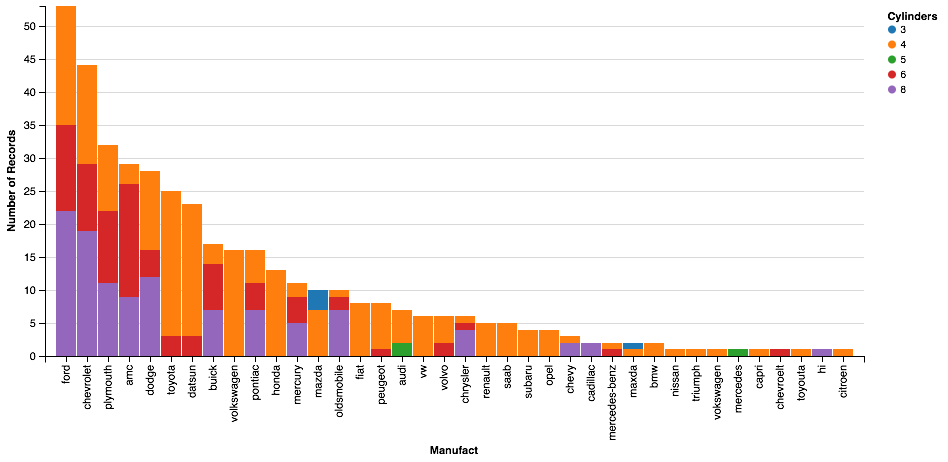

In [72]:
alt.Chart(cars_df).mark_bar().encode(
    x=alt.X('Manufact', sort=alt.SortField(field='*', op='count', order='descending')),
    y='count(*)',
    color='Cylinders:N',
)

# Let's order the bars by the value

# Other things to explore/remember

- Gathering insights follows the same steps we have gone through today, requires patience
- You have to read the manuals and tutorials to lear
 - for altair, you have to see the resources form last week
- We might want to create our own groups, or perform the analysis on filtered data
 - In previous example, analyze the top 5 manufactureres

# Other things to explore/remember cont.

- Find out more about binning in histograms
 - This is specific for continuous data and determins the width of the bar
 - Current assignment has something to say about this
- Dont' forget this is the first step in data analysis, we barely scratched the surface
 - Next week's advanced topics will build on data prepared in this step

# Guidlines for doing exploratory analysis

## 1. Know your goal
- Answer specific question (Targeted)
- Build DSS (Targeted)
- Extract insights (Broad)

For targeted approaches try to determine the data you will need

## 2. Understand your data

- Examine the data frame and all the columns
- Know what the data is
- Check for missing data and problems with distributions
- Analysis at this stage is univariate

## 2. Understand your data cont.


- Determine data appropriateness and what transformation are needed
- Identify grouping variables and levels of analysis

Prepare a report/table/list that details data definitions and characteristics, and details any transformations performed to the data.

Report should also explain whether the data is suffecient for targetted approaches and what additional information is needed to complete the analysis

## 3. Prepare the data

- Collect any additional required information
- Perform any required transformations
- Handle any issues with missing data
- Resolve any distributional issues with the data

Data should be ready for the analysis after this step

## 4. Perform the analysis

- Comparison of variables using appriate plots
- Generation of ranking tables
- Start with higher levels of analysis, then dive to lower
- Try different groups for analysis
- Extract insights and possible questions to ask
- Iterate! don't be afraid to go back to step 1

Write everything down

# The writeup

- Should be on jupyter notebook
- Clarity will depend on how you organize
- Split notebook into:
 1. **Results:** Where you keep a summary of findings
 2. **Analysis:** The details, be sure to include headers to make it wasy to link results to analysis

# The Results

- Summarize main findings
 - Use tables, lists, or graphs when appropriate
- Section should be in markdown
- Can be converted in to a slideshow
- Include appropriate graphs from analysis
 - copy the link to the image that you want then paste it to a markdown link like this:
 
 ```![]( image_url_here )```

Reading the result section should highlight the main findings/insights from the analysis

# The analysis

- This is where you write the code
 - Write your thoughts next to the analysis to keep track of it
- The findings from this section will be compiled into the results section at the top of the notebook
- This section will be hidden in the presentations
 - Remember to set the cells as hidden for the slides

# The Midterm Project

- Individual work, that is due on **Nov 19th via Slack**
- **The task:** Perform exploratory analysis on an online data source after receiving approval for it from your instructor
- **Deliverables include:**
 - The notebook
 - The PDF report
 - The slides


# Suggested Online Data Sources
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Knoema datasets](https://knoema.com/GULF2016/gulf-dataset-2015)
- [The Humanitarian Data Exchange](https://data.humdata.org/group/kwt)
- [US Data](http://data.un.org/Explorer.aspx?d=EDATA)
- [IMF Data](http://www.imf.org/en/Data)
- [World Bank](https://data.worldbank.org/data-catalog/)
- [Internationa Aid Transparency Initiative](https://www.iatiregistry.org/csv/download)
- [Resources for 424 Info Vis. Course at University of Washington](http://courses.washington.edu/info424/2007/DataSources.htm) By. Prof. Maureen Stone and Prof. Polle Zellweger. Includes links to various data sources.

# Criteria for acceptable data sets
- At least 6 original variables and 500 observations
 - Excluding any transformed variables by the student or ID columns
- Variables must include, or we can extract:
    - Continuous data
    - Multiple Categorical/Grouping data
    - Time data (Can exclude if data is rich, needs approval)
